In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split as split

In [2]:
import json
import pandas as pd
f = open('train.json', 'r', encoding = 'utf-8')
data = pd.read_json(f)

g = open('test.json', 'r', encoding = 'utf-8')
validation = pd.read_json(g)

In [3]:
validation.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


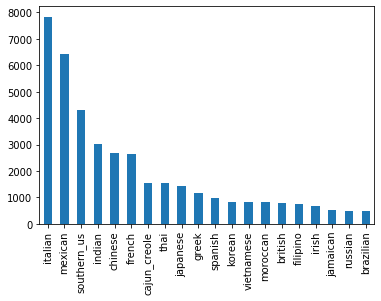

In [3]:
weights = data['cuisine'].value_counts()
weights.plot(kind='bar')
weights = weights.to_dict()

In [5]:
ind = []
for i in range(data.shape[0]):
    ind.extend(data['ingredients'][i])

from collections import Counter
tab1 = Counter(ind)
len(tab1)

6714

In [4]:
ingredients = [" ".join(ing) for ing in data['ingredients']]

X = CountVectorizer().fit_transform(ingredients) #########
X.shape

np.random.seed(2020208)
X_tr, X_te, y_tr, y_te = split(X, data['cuisine'], test_size=0.2)

In [8]:
### Support Vector Machine Classifier ###
"""
WARNING: This cell could take colossal amount of time to run
"""

from sklearn import svm

C = np.linspace(0,10, 20)[1:]
f1 = []

counter = 1

for c in C:
    model = svm.SVC(C = c, kernel = 'linear', class_weight = weights) ######### kernel & weights
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    f1.append(metrics.f1_score(y_pred, y_te, average = 'weighted'))
    
    print(counter, f1[counter-1])
    counter += 1
    
plt.plot(C, f1)

1 0.7150599182955136


KeyboardInterrupt: 

In [26]:
### Random Forest ###
from sklearn.ensemble import RandomForestClassifier

rdforest = RandomForestClassifier(random_state = 0, class_weight = weights)
rdforest.fit(X_tr, y_tr)
y_pred_rdforest = rdforest.predict(X_te)
metrics.f1_score(y_te, y_pred_rdforest, average = 'weighted')

0.7320415688094614

In [30]:
### Decision Tree ###
from sklearn.tree import DecisionTreeClassifier

dctree = DecisionTreeClassifier(random_state=0, class_weight = weights)
dctree.fit(X_tr, y_tr)
y_pred_dctree = dctree.predict(X_te)
metrics.f1_score(y_te, y_pred_dctree, average = 'weighted')

0.6171943953676462

In [33]:
### Multinomial Logistic Regression ###
from sklearn.linear_model import LogisticRegression

mtlogit = LogisticRegression(random_state=0, class_weight = weights, max_iter = 10000)
mtlogit.fit(X_tr, y_tr)
y_pred_mtlogit = mtlogit.predict(X_te)
metrics.f1_score(y_te, y_pred_mtlogit, average = 'weighted')

0.7110963573767676

In [6]:
### Multi-layer Perceptron Classifier ###
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state = 0)
mlp.fit(X_tr, y_tr)
y_pred_mlp = mlp.predict(X_te)
metrics.f1_score(y_te, y_pred_mlp, average = 'weighted')

0.7510249896423608

* `CountVectorizer` `TfidfVectorizer`?? \[Repetitive measure\]
* What advantage do we gain using TF over sklearn.neural_network? 
---
> Architecture \
> Optimizer \
> Sentence data (ordering) \
> Collaborative raking
---
* `class_weight` 
* Performance measure (recall, confusion matrix, ROC?)
* Server access
---
> Email James or Nehad
---
* What is a pipeline
---
> Preprocessing \
> Train/test split \
> Cross validation \
> Missingness \
> Stemmer
---
* Recommendation task \[think of cuisine as a person\]; ranking problem: most likely to the least likely (implicit feedback setting; ndcg; hit rates)
* Spend more time on the recommendation system; EVALUATE the performance!!
* https://arxiv.org/abs/1803.00114